# 5주차 스터디


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 판다스 

In [5]:
spam = pd.read_csv("5주차_spam.csv")

spam["target"] = np.where(spam["target"]=="spam", 1,0)

spam

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


데이터 전체에서 spam의 비율이 몇 퍼센트일까요

In [22]:
def calculate_ratio(t):
    '''
    비율을 계산하는 함수입니다
    '''
    return sum(spam.target == t) / len(spam.target)

calculate_ratio(1)

0.13406317300789664

spam의 문자열 수와, non_spam의 문자열 수와 그 평균을 계산해봅시다

In [38]:
avg_notspam = spam.query("target == 0")["text"].apply(len).mean()
avg_spam = spam.query("target == 1")["text"].apply(len).mean()

avg_notspam, avg_spam

(71.02362694300518, 138.8661311914324)

숫자가 평균적으로 몇 번 들어가 있을까요

* 정규표현식 소개 (Regular Expression)

In [41]:
string = "한 주당 1,000원, 시가총액은 300,000,000원입니다"

In [43]:
import re

re.findall("[0-9,]+ 원", string)
re.findall("[0-9,]+원", string)

['1,000 원', '300,000,000 원']

In [45]:
def find_digit(x):
    return re.findall("[0-9]",x)

In [49]:
spam.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [58]:
spam["text"].apply(find_digit)\
            .apply(len)       \
            .mean()

2.371859296482412

## 싸이킷런

In [69]:
from sklearn.datasets import load_wine

df = load_wine(as_frame=True)

X = df["data"]
y = df["target"]

y_bi = (y == 1).astype("int64")

In [77]:
X.isnull().sum().sum() , y.isna().sum()

(0, 0)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_bi, train_size=0.8)

X_train.shape

(142, 13)

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
a = tree_model.feature_importances_
a

array([0.        , 0.109081  , 0.058807  , 0.02885573, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.74815544,
       0.        , 0.05510083, 0.        ])

In [94]:
b = range(len(a))

In [103]:
tree_model.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [ ]:
plt.bar(f,a)
plt.xticks(rotation=90);

### 분류기 평가 Metric 


* 정확도 / 정밀도 / 재현율

In [104]:
tree_model.score(X_train, y_train)

1.0

In [105]:
tree_model.score(X_test, y_test)

0.8888888888888888

목표로 하는 task에 따라서 중요하게 생각해야하는 Metric이 달라진다 (통계학의 1종오류, 2종오류 개념과 유사)

* 정확도(Accuracy)  : 전체 데이터 수 중 예측 결과와 실제 값이 동일한 건수(TN + TP)가 차지하는 비율

* 정밀도(Precision) : 예측을 Positive로 한 대상(FP + TP) 중 예측과 실제 값이 Positive로 일치한 데이터(TP)의 비율

* 재현율(Recall) : 실제가 Positive인 대상(FN + TP) 중 예측과 실제 값이 Positive로 일치한 데이터(TP)의 비율



In [106]:
from sklearn.metrics import precision_score, recall_score

predicct_value = tree_model.predict(X_test)

precision_score(y_test, predicct_value)

0.9333333333333333

In [107]:
recall_score(y_test, predicct_value)

0.8235294117647058

### Cross-Validation 소개

* Test-set을 미리 들여다 보는 우를 범하지 않기 위해 사용함

In [110]:
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeClassifier()

cross_val_score(tree_model, X_train, y_train, cv=10)

array([0.93333333, 1.        , 0.92857143, 0.92857143, 0.92857143,
       1.        , 0.85714286, 1.        , 0.78571429, 0.92857143])

### Grid-Search 소개

* Grid-Search
* Random-search

In [111]:
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier()

param_grid = {"criterion":["gini","entropy"],
              "max_depth":[10,20,30]}

model_grid = GridSearchCV(tree_model, param_grid, cv=3)
model_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30]})

In [112]:
model_grid.best_params_  

{'criterion': 'entropy', 'max_depth': 10}

### Mnist Dataset을 이용한 분류기 만들어 보기!

* 숫자 손글씨를 인식하는 분류기를 만들어 봅시다

In [7]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [1]:
from sklearn.datasets import fetch_openml

df = fetch_openml("mnist_784", version=1, as_frame=False)

X = df["data"]
y = df['target']

In [8]:
X.shape

(70000, 784)

In [9]:
y = y.reshape(-1,1)
y

array([['5'],
       ['0'],
       ['4'],
       ...,
       ['4'],
       ['5'],
       ['6']], dtype=object)

['2']


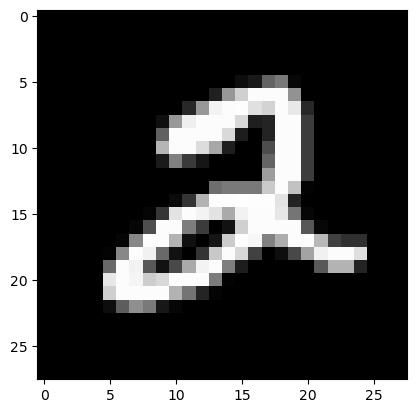

In [10]:
sample = X[5].reshape(28,28)
print(y[5])
plt.imshow(sample, cmap='gray');

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
# 그리드 서치로 최적의 모델을 찾아봅시다 (대략 5분 정도 소요됩니다)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth" : [60,80]}

random_clf = GridSearchCV(random_model, param_grid=param_grid, cv=3, verbose=True)
random_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was pa

KeyboardInterrupt: 

In [125]:
random_clf.best_params_

{'criterion': 'gini', 'max_depth': 60}

In [126]:
random_clf.score(X_test,y_test)

0.9708

In [141]:
y_test[10]

'0'

In [140]:
random_clf.predict(X_test)[10]

'0'